# 문자를 읽을 수 있는 딥러닝

1. keras-ocr 써보기
2. Tesseract OCR 써보기

In [1]:
import os
from PIL import Image

import matplotlib.pyplot as plt
import keras_ocr
import pytesseract
from pytesseract import Output

In [2]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [9]:
work_dir = os.getenv('HOME')+'/aiffel/aiffel_projects/exploration/E18_ocr_python/images'
img_file_path = os.listdir(work_dir)

img_files = [item for item in img_files[:-1]]

print(img_files)

['5.png', '1.png', '7.jpg', '2.jpg', '6.jpg', '3.png', '4.jpg']


In [10]:
images = [keras_ocr.tools.read(work_dir + '/'+ img) for img in img_files]

prediction_groups = [pipeline.recognize([img]) for img in images]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


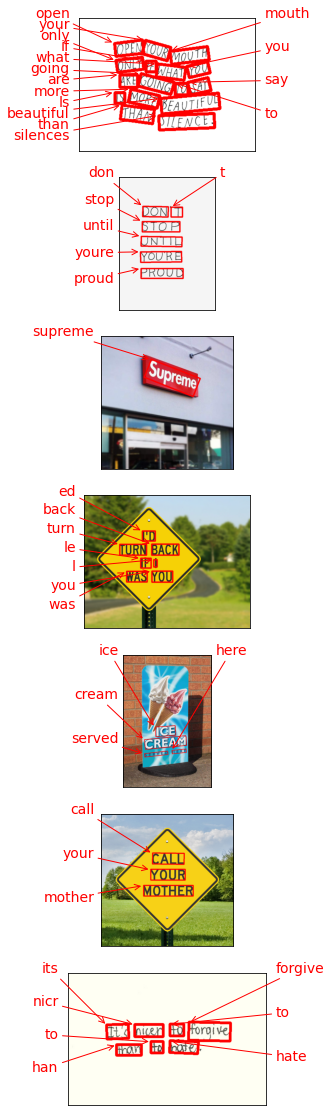

In [11]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

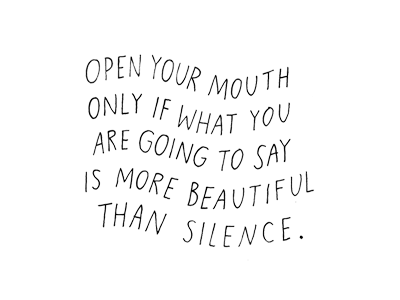

AKt

COIN

TO

SAY

|S

MORE

HEA

TIF UL

/\/

SILENCE.

---------------------------------


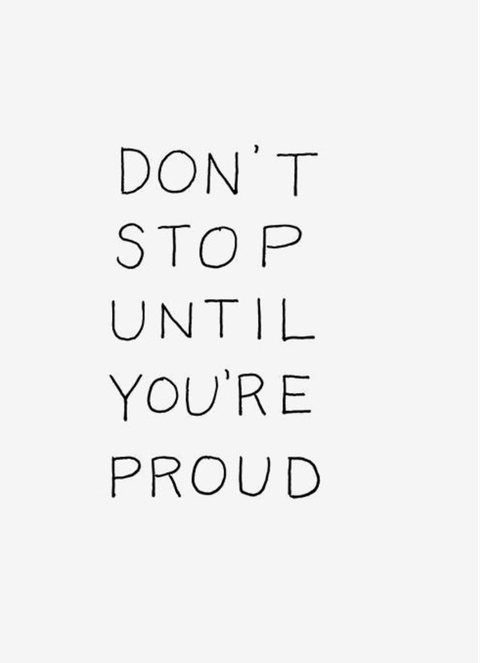

DON

TT

STOP

LIN T IE

YOURE

PROUD

---------------------------------


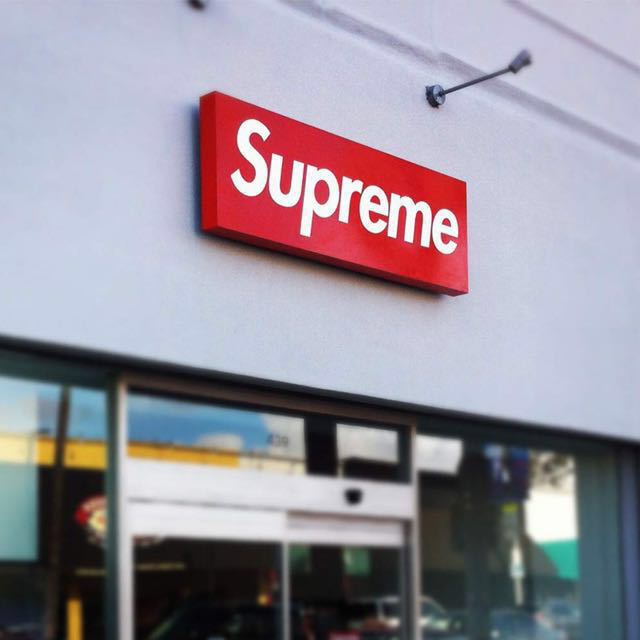

a

---------------------------------


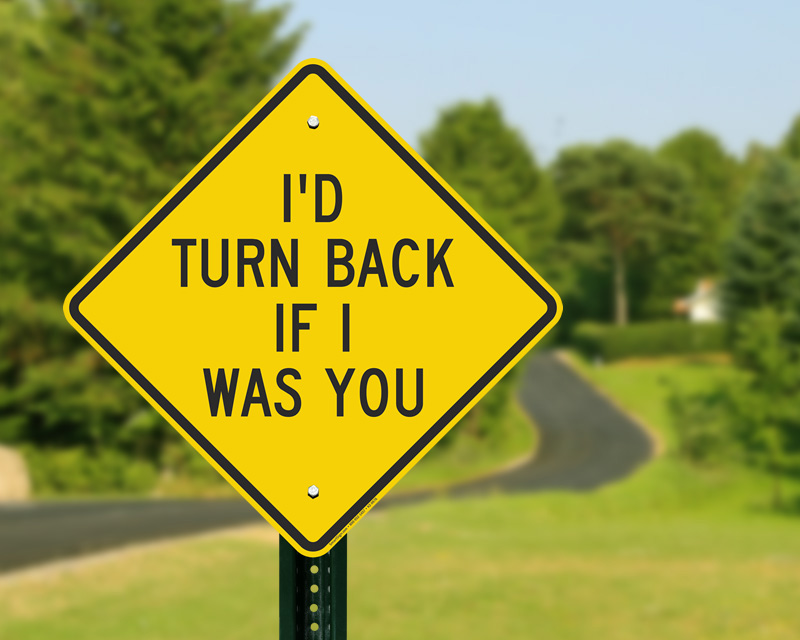

ee

---------------------------------


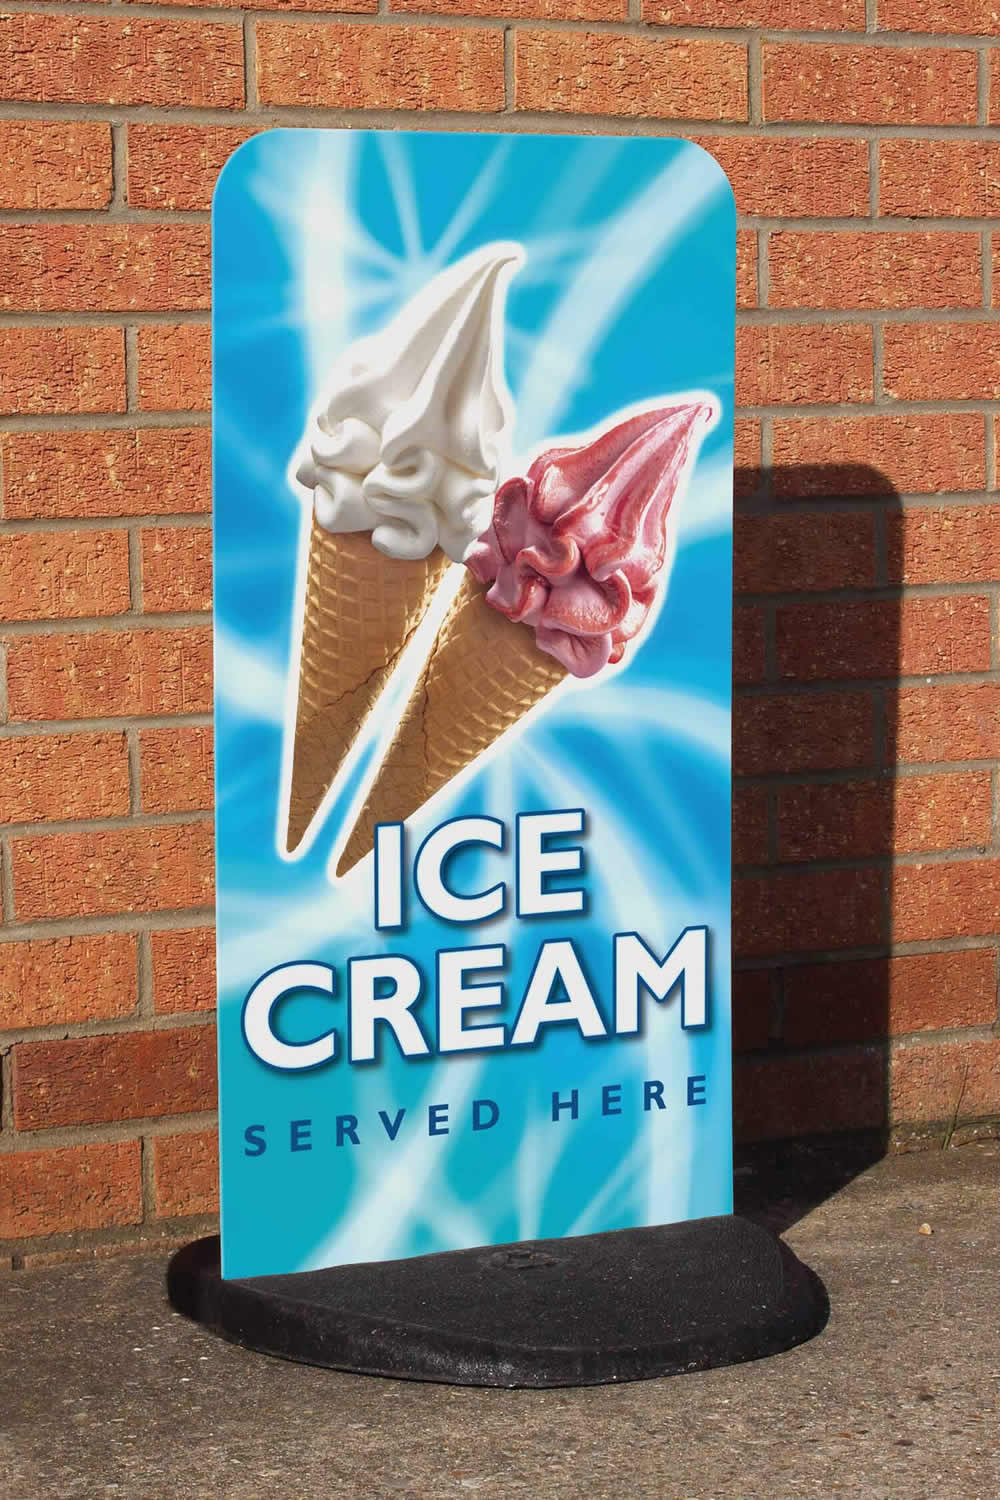

,

---------------------------------


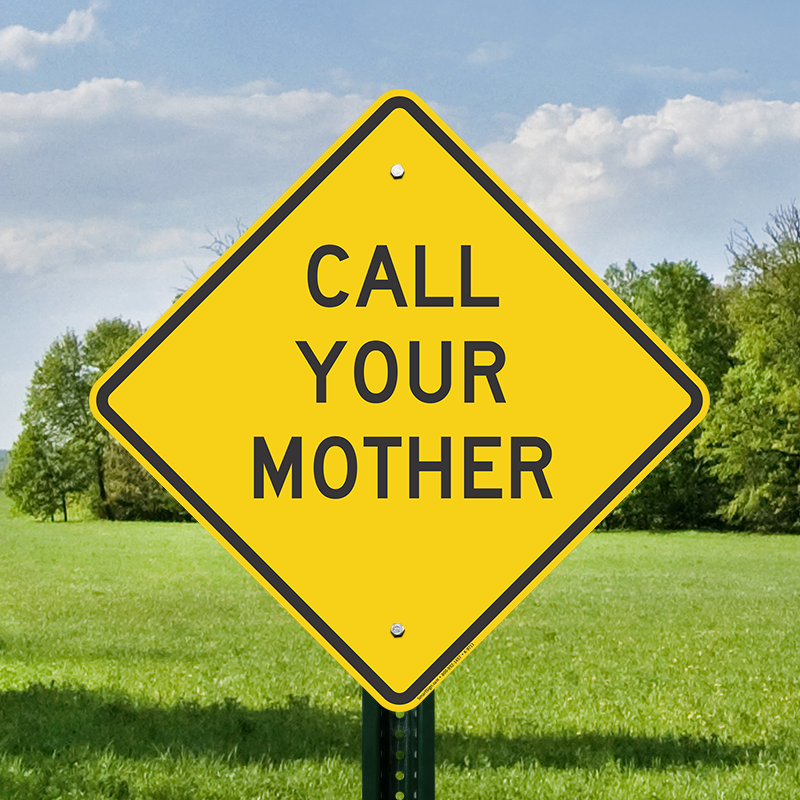

o/ CALL

2 MOTHER “gage


~ a


CALL

YOUR

MOTHER

---------------------------------


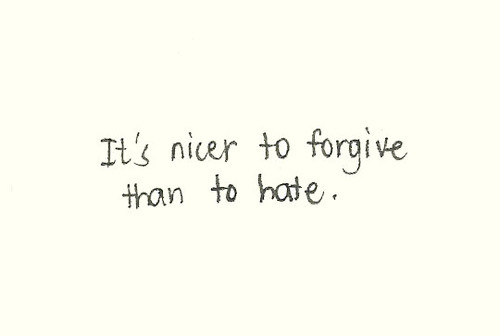

TH

nice

+0)

Forgive

Han

+p

NOt, .

---------------------------------


In [16]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)
    display(image)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("---------------------------------")


for img in img_files:
    img_path = work_dir + '/' + img
    cropped_image_path_list = crop_word_regions(img_path, work_dir)
    recognize_images(cropped_image_path_list)

## Conclusion

- 총 7개의 테스트 이미지 사용함
- 비교적 선명하고 일관된 폰트 디자인의 텍스트 이미지를 사용함
- 그럼에도 불구하고 테서렉트의 경우 단 하나의 이미지도 정확하게 OCR이 이루어지지 않음
- keras-okr의 경우 모든 이미지에서 거의 정확하게 OCR이 이루어짐